<a href="https://colab.research.google.com/github/rafdimag12/Project-AI-ML-Enginer/blob/main/06_computer_vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Computer Vision - CNN

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Make a copy of the Project**: Please make a copy of this project either to your own Google Drive or download locally. Work on the copy of the project. The master project is **Read-Only**, meaning you can edit, but it will not be saved when you close the master project. To avoid total loss of your work, remember to make a copy.

2. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
3. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed project files, aiding you in keeping your work organized and accessible.
   
4. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
5. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
6. **Setting Permission to Public**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description

In this CNN Project, you will create your own custom Image Classification. You can collect a dataset of images you are interested in and train a CNN model to differentiate between them. For example, a model could be trained to distinguish between different types of birds, cars, plants, or any other topic of interest.

## Grading Criteria

There are 4 tasks with 5 criterias for scoring, all except Criteria 3 have the same weight. Each criteria except Criteria 3 will give you either 100 point if you are correct and 0 if you are wrong. The final score for the project will the the average of all 5 criterias from 4 tasks in this project.

* Task-1 Criteria 1: This task will assess your ability to find a good dataset for your model.

* Task-2 Criteria 2: This task will assess your ability to create and save your model for later use in the inference step.

* Task-2 Criteria 3: The task will assess your ability to evaluate your model based on accuracy score of the model. The accuracy score is directly used as the score. Please refrain from overtraining your model to gain 100% accuracy.

* Task-3 Criteria 4: This task will assess your ability to use Gradia as a UI (User Interface).

* Task-4 Criteria 5: This task will assess your ability to publish your model to Huggingface.


## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "REA6DSAKJ" # @param {type:"string"}
name = "Rafdi Magiana Ibadurrahman" # @param {type:"string"}
drive_link = "https://colab.research.google.com/drive/1GmIiz9JTkYOeEOjfLXk0ZMlN69wO81J6?usp=sharing"  # @param {type:"string"}

assignment_id = "00_cnn_project"

## Import Package

In [ ]:
!pip install rggrader
from rggrader import submit, submit_image

In [ ]:
#Write any package/module installation that you need here



## Task-1 Load the dataset

In this task, you will prepare and load your dataset. **You can choose any dataset you want**, make sure the data is diverse and large enough to prevent overfitting and improve the model's ability to generalize.

If you are using images from the internet, **please respect copyright and privacy laws**. Creative Commons licenses or public domain images are a safe bet, and many APIs (like the Unsplash API) provide access to a large number of such images.

### 1.1 Optional Custom Dataset
Provided below is a custom dataset template that you may want to use for your code. It's completely optional.

Alternatively, you can review the material on Data Augmentation or read the Pytorch tutorial https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.55MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.83MB/s]


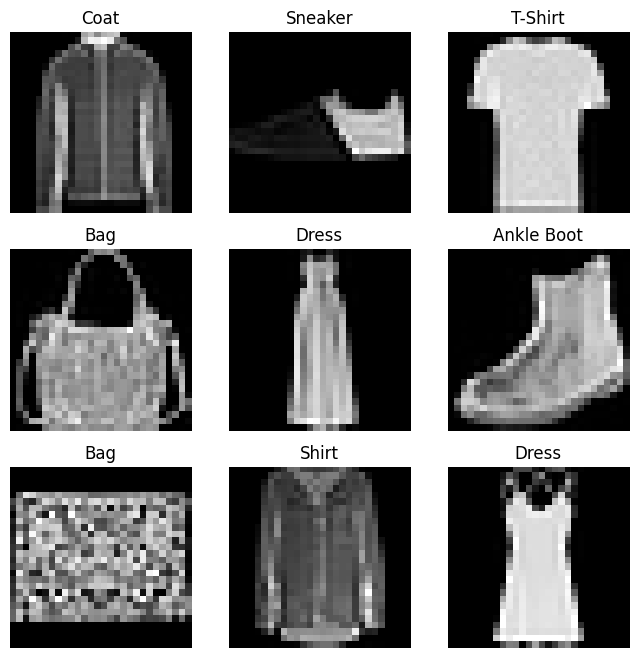

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
#an example of creating our own custom dataset, you can use this if you want/need. Completely optional.
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


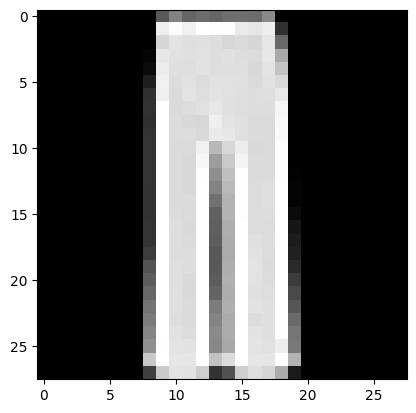

Label: 1


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### 1.2 Write your code in the block below

In the code block below, prepare and load your dataset. Please include data preprocessing steps such as dividing the dataset into training, validation, and test sets, or data augmentation techniques that you used if any in this section. Do not put the code to build your model here.

Some techniques you may use:
- Find and load existing dataset from Huggingface or Kaggle. (Easy)
- Create your own custom dataset from the images you have in your possesion or internet search and load the dataset. (Hard)
- Etc.

Hint:
- Usually the dataset are loaded into train_dataset and test_dataset

In [ ]:
# definisi transformasi pada gamabr
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transforms
transform = transforms.Compose([
    transforms.ToTensor(), # mengubah torch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #((mean),(std)) 0-255 --> 0 - 1
])

# Download the dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) # data cifar 10
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

In [ ]:
# Define the model
model = resnet18(weights='DEFAULT') # model resnet 18 layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 65.1MB/s]


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from torch.utils.data import DataLoader

# Define the batch size and number of epochs
batch_size = 32
num_epochs = 1

In [ ]:
# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### 1.3 Submission

You'll submit the link to your dataset for Task-1.

- If you use existing dataset from Kaggle or Huggingface, then you can put the link to those dataset here.

- If you use your own custom dataset, Upload and store the custom dataset in your Google Drive that you shared with us and put the link to the folder containing that dataset here.

In [ ]:
# Submit Method
dataset_link = "https://huggingface.co/datasets/uoft-cs/cifar10" # Put your model link

question_id = "00_cnn_project_dataset"
submit(student_id, name, assignment_id, dataset_link, question_id, drive_link)

## Task-2 Build your model

In this task, you will now build and save your model. You can either create your own CNN model or choose any pretrained model that you feel is most appropriate for your dataset.

### 2.1 Write your code in the block below

In the code block below, write the code to **create your model, either from scratch or fine tuning a pretrained model**. You will need to write the code for your model definition, such as the layers used, loss function and optimizer. Please include also the training and validation loops.

Make sure you **save your model to a file** and **measure the accuracy of your model**, as this will be submitted for this task.

Some techniques you may use:
- Use pretrained model. (Easy)
- Create a CNN model from scratch. (Hard)
- Etc.

Hint:
- Use GPU in Google Colab, it significantly improves the time taken for training, compared to CPU.
- **Google Colab GPU usage for free-tier have a limit**, which is unknown, so I suggest you try out in CPU mode that your code works without error, then use GPU for traininig.
- If you are going to upload to Huggingface by using the Transformer Trainer during training, make sure you use the Huggingface method. Refer to Transfer Learning section or read the documentation here: https://huggingface.co/docs/transformers/model_sharing

In [ ]:
#Write your code to build your model here

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i + 1) % 100 == 0:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

    # Test the model
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100*correct/total
   # Print the accuracy
    print('Epoch [{}/{}], Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, accuracy)) #if you change the name of your accuracy variable, change the name also in the submit parameter



Epoch [1/1], Batch [100/1563], Loss: 0.4365
Epoch [1/1], Batch [200/1563], Loss: 0.4495
Epoch [1/1], Batch [300/1563], Loss: 0.4578
Epoch [1/1], Batch [400/1563], Loss: 0.4422
Epoch [1/1], Batch [500/1563], Loss: 0.4393
Epoch [1/1], Batch [600/1563], Loss: 0.4582
Epoch [1/1], Batch [700/1563], Loss: 0.4480
Epoch [1/1], Batch [800/1563], Loss: 0.4504
Epoch [1/1], Batch [900/1563], Loss: 0.4562
Epoch [1/1], Batch [1000/1563], Loss: 0.4623
Epoch [1/1], Batch [1100/1563], Loss: 0.4602
Epoch [1/1], Batch [1200/1563], Loss: 0.4755
Epoch [1/1], Batch [1300/1563], Loss: 0.4634
Epoch [1/1], Batch [1400/1563], Loss: 0.5044
Epoch [1/1], Batch [1500/1563], Loss: 0.4561
Epoch [1/1], Test Accuracy: 78.50%


In [ ]:
# Save the trained model to a file
torch.save(model.state_dict(), 'resnet18_cifar10_classifier.pth')
print('Model saved')

Model saved


### 2.2 Submission

You'll submit the link to your model and the accuracy score for your model in this section.

Remember to download or move/upload your model from Google Colab to your Google Drive. Put the link to the Google Drive for your model below.

If you use a different variable to store your accuracy, remember to also change the `accuracy` variable below.

In [ ]:
# Submit Method
model_link = "https://huggingface.co/datasets/uoft-cs/cifar10" # Put your model link

question_id = "01_cnn_project_model_link"
submit(student_id, name, assignment_id, model_link, question_id, drive_link)
question_id = "02_cnn_project_model_accuracy"
submit(student_id, name, assignment_id, str(accuracy), question_id, drive_link)

'Assignment successfully submitted'

## Task-3 Model Inference

In this task, you will be exercising the application of your model, or as it's commonly referred to in AI terminology, you will be performing inference using your model.

Simply load your saved model from Task-2 and create an inference for the model. Where you'll feed an image as input and the model will output the label as well as the percentage of confidence for the label.

### 3.1 Write your code in the block below

In the code block below write the code to use the model you created in Task-2. Load the model and input image, afterwards, show the result of the label/class together with confidence level in percentage as well as the input image.

In [ ]:
#Write your code for inference here
import torch
import torchvision.models as models
import requests
from PIL import Image
from torchvision import transforms
import io

# Load the model architecture (e.g., ResNet18)
model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Load the saved model weights
model_weights_path = 'resnet18_cifar10_classifier.pth'  # Path to the saved model weights on your local disk
model.load_state_dict(torch.load(model_weights_path))

# Put the model in evaluation mode
model.eval()

# URL of the image you want to classify
#image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/200125-N-LH674-1073_USS_Theodore_Roosevelt_%28CVN-71%29.jpg/1200px-200125-N-LH674-1073_USS_Theodore_Roosevelt_%28CVN-71%29.jpg'  # aircraft carrier
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-LQwYGf3Ohbx-TAfRNTyAAkTM2904UHRHhQ&s' #airplane

# Download the image from the URL
response = requests.get(image_url)

if response.status_code == 200:
    # Open the downloaded image with PIL
    img = Image.open(io.BytesIO(response.content))
else:
    print('Failed to download the image.')

# Apply the same transformations used during training (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to match model's input size, CIFAR10 was 32x32, try commenting this and see if the prediction is still correct
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

input_data = transform(img).unsqueeze(0)  # Add a batch dimension

#We use CIFAR10 labels
class_to_label = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

with torch.no_grad():
    output = model(input_data)

# Get the predicted class label
_, predicted_class = torch.max(output, 1)

# Print the predicted class
print('Predicted Class:', predicted_class.item())
print('Predicted Label:', class_to_label[predicted_class.item()])


Predicted Class: 5
Predicted Label: dog


### 3.2 Submission

You'll submit a screenshot of your inference in this section. Remember to save the screenshot first before submitting it.

Hint:

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

- In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

    - Image name screenshot is `submission.jpg`. If you change the name of the screenshot  file, change it also in the submit_image parameter.
    - The input image and label as well as percentage of confidence should be included in the screenshot

Here is an example of a correct screenshot:

![Screenshot submission sammple - hummer](https://storage.googleapis.com/rg-ai-bootcamp/projects/project-5-cnn-hummer.png)

In [ ]:
# Submit Method

question_id = "03_cnn_project_inference"
submit_image(student_id, question_id, 'submission.jpeg')

'Assignment successfully submitted'

## Task-4 Model Publishing

In this task, you will push your model to Huggingface. Once you've pushed your model to the Hugging Face Model Hub, you'll have a link that points directly to your model's page. You can share this link with others, and they can use it to directly load your model for their own uses.

### 4.1 Write your code in the block below

In the code block below, write the code to push your model to Huggingface. There are several methods to do this, please refer to the documentation: https://huggingface.co/docs/transformers/model_sharing

Some techniques you may use:
- If you use the Transformer Trainer during the training loop when you create your model above, then you can simply put your `trainer.push_to_hub()` here.
- You can also use the web interface on Huggingface.

Hint:
- Remember to login first to your Huggingface account.
- If you are pushing programmaticaly, then use the huggingface-cli to login.

In [ ]:
#Write your code for publishing here



### 4.2 Submission

You'll submit a a link to your huggingface model in this section.

The following link is an example of what a trained model's page looks like: https://huggingface.co/aditira/emotion_classification. This is not your model, but rather an example of what your final result might resemble.

Remember, for this project you should push your output model to your own Hugging Face account. The link for your model will be different and should reflect your own username and model name.

In [ ]:
# Submit Method
huggingface_model_link = "" # Put your model link

question_id = "04_cnn_project_publish"
submit(student_id, name, assignment_id, huggingface_model_link, question_id, drive_link)

FIN